In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

device = "cuda:0"
torch.set_default_device(device)

from LION.experiments import ct_experiments
experiment = ct_experiments.LowDoseCTRecon(dataset="LIDC-IDRI")
lidc_dataset = experiment.get_training_dataset()

from scripts.example_scripts.PCM_CS_demo import run_demo

Preparing patient list, this may take time....
Patient lists ready for train dataset


Using device: cuda:0
Running FISTA reconstruction: 1000 iterations, lambda=10...


FISTA l1:  64%|██████▍   | 641/1000 [00:04<00:02, 145.95it/s]


Running debiasing: 10 iterations...


Debiasing LS:  10%|█         | 1/10 [00:00<00:00, 72.74it/s]


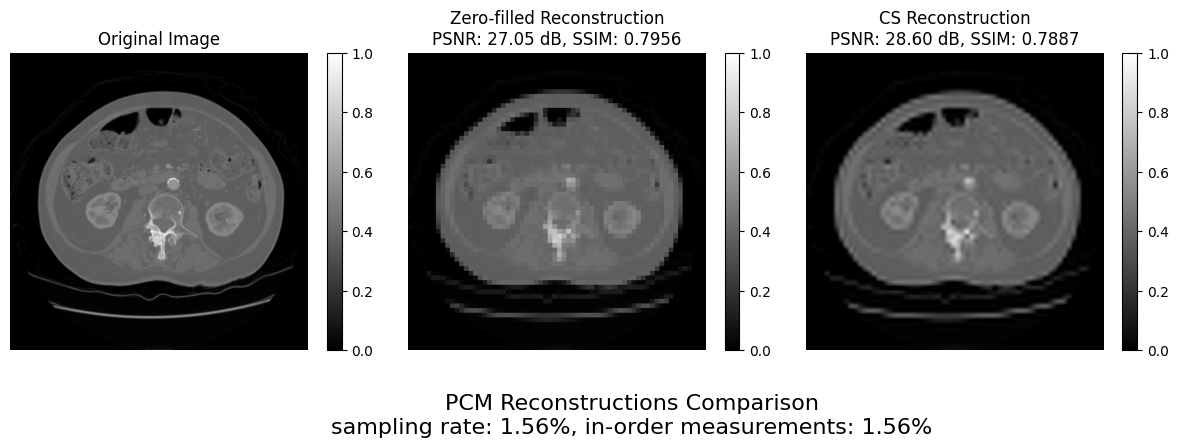

In [3]:
run_demo(
    dataset=lidc_dataset,
    # subtract_from_J=1,
    # delta_divided_by=4,
    # subtract_from_J=2,
    # delta_divided_by=16,
    subtract_from_J=3,
    delta_divided_by=64,
    # fista_lambda=1e5,
    fista_lambda=10,  # Good for Wavelet2D_DB4
    # fista_lambda=1e-3,
    # fista_lambda=1e-12,
    fista_max_iter=1000,
    debias_max_iter=10,
    # verbose=True,
)